# Examine Missing Data

The purpose of this page is to examine:
- how much data is missing
- examine the data gaps: can they be filled?

In [1]:
import hydrofunctions as hf
print("Hydrofunctions version: ", hf.__version__)

import pandas as pd
print("Pandas version: ", pd.__version__)
import numpy as np
print("Numpy version: ", np.__version__)

import matplotlib
import matplotlib.pyplot as plt
print("Matplotlib version: ", matplotlib.__version__)
%matplotlib inline

import analysis_functions
print("Analysis_functions version: ", analysis_functions.__version__)

from scipy.stats import linregress

Hydrofunctions version:  0.2.4
Pandas version:  2.3.0
Numpy version:  2.3.0
Matplotlib version:  3.10.3
Analysis_functions version:  2025.06.09


In [2]:
# Load Data
WBdata = pd.read_parquet('WBdata.parquet')
#WBdata = pd.read_parquet('WBdata-stage.parquet')  
#WBmeta = pd.read_parquet('WBmeta-stage.parquet')

data = analysis_functions.create_multi(WBdata)
data.head() 

site                      01541200                 01541303                  \
param                        00060      00065         00060      00065        
meta                          data flag  data flag     data flag  data flag   
datetimeUTC                                                                   
2012-10-01 04:00:00+00:00    242.0    A  3.59    A    256.0    A  3.25    A   
2012-10-01 04:15:00+00:00    246.0    A  3.60    A    256.0    A  3.25    A   
2012-10-01 04:30:00+00:00    242.0    A  3.59    A    256.0    A  3.25    A   
2012-10-01 04:45:00+00:00    242.0    A  3.59    A    256.0    A  3.25    A   
2012-10-01 05:00:00+00:00    242.0    A  3.59    A    256.0    A  3.25    A   

site                      01542500                 01545500                  \
param                        00060      00065         00060      00065        
meta                          data flag  data flag     data flag  data flag   
datetimeUTC                                                                   
2012-10-01 04:00:00+00:00    652.0    A  1.82    A   1340.0    A  0.84    A   
2012-10-01 04:15:00+00:00    652.0    A  1.82    A   1340.0    A  0.84    A   
2012-10-01 04:30:00+00:00    652.0    A  1.82    A   1320.0    A  0.82    A   
2012-10-01 04:45:00+00:00    646.0    A  1.81    A   1320.0    A  0.82    A   
2012-10-01 05:00:00+00:00    646.0    A  1.81    A   1310.0    A  0.81    A   

site                      01551500                  
param                        00060      00065       
meta                          data flag  data flag  
datetimeUTC                                         
2012-10-01 04:00:00+00:00   2950.0    A  1.35    A  
2012-10-01 04:15:00+00:00   2950.0    A  1.35    A  
2012-10-01 04:30:00+00:00   2970.0    A  1.36    A  
2012-10-01 04:45:00+00:00   2970.0    A  1.36    A  
2012-10-01 05:00:00+00:00   2970.0    A  1.36    A

In [3]:
analysis_functions.multi_missing(data)

counts     ratio
site     param flags                       
01541200 00060 A           139861  0.996502
               hf.missing     491  0.003498
               nulls          491  0.003498
         00065 A           140087  0.998112
               hf.missing     265  0.001888
               nulls          265  0.001888
01541303 00060 A           125540  0.894465
               hf.missing   14812  0.105535
               nulls        14812  0.105535
         00065 A           140311  0.999708
               hf.missing      41  0.000292
               nulls           41  0.000292
01542500 00060 A           135451  0.965081
               hf.missing    4901  0.034919
               nulls         4901  0.034919
         00065 A           140347  0.999964
               hf.missing       5  0.000036
               nulls            5  0.000036
01545500 00060 A           128494  0.915512
               hf.missing   11858  0.084488
               nulls        11858  0.084488
         00065 A           140296  0.999601
               hf.missing      56  0.000399
               nulls           56  0.000399
01551500 00060 A           127922  0.911437
               hf.missing   12430  0.088563
               nulls        12430  0.088563
         00065 A           140302  0.999644
               hf.missing      50  0.000356
               nulls           50  0.000356

In [4]:
analysis_functions.multi_missing2(data)

count     ratio
site     param flags                       
01541200 00060 A           139861  0.996502
               hf.missing     491  0.003498
         00065 A           140087  0.998112
               hf.missing     265  0.001888
01541303 00060 A           125540  0.894465
               hf.missing   14812  0.105535
         00065 A           140311  0.999708
               hf.missing      41  0.000292
01542500 00060 A           135451  0.965081
               hf.missing    4901  0.034919
         00065 A           140347  0.999964
               hf.missing       5  0.000036
01545500 00060 A           128494  0.915512
               hf.missing   11858  0.084488
         00065 A           140296  0.999601
               hf.missing      56  0.000399
01551500 00060 A           127922  0.911437
               hf.missing   12430  0.088563
         00065 A           140302  0.999644
               hf.missing      50  0.000356

In [5]:
# Notes:
# Stage: 00065  has fewer missing data points
# Discharge: 00060  has as many as 10.55% missing data at 01541303
# the 'hf.missing' tag marks every null value; there is no other case or situation; there are 140,352 measurements or nulls in each data set
analysis_functions.print_missing(data)

01541200
  00060:  #nulls (%):    491 ( 0.35%)  flag:'hf.missing' (%):    491 ( 0.35%)  flag:'A': 139861   total:   140352
  00065:  #nulls (%):    265 ( 0.19%)  flag:'hf.missing' (%):    265 ( 0.19%)  flag:'A': 140087   total:   140352
01541303
  00060:  #nulls (%):  14812 (10.55%)  flag:'hf.missing' (%):  14812 (10.55%)  flag:'A': 125540   total:   140352
  00065:  #nulls (%):     41 ( 0.03%)  flag:'hf.missing' (%):     41 ( 0.03%)  flag:'A': 140311   total:   140352
01542500
  00060:  #nulls (%):   4901 ( 3.49%)  flag:'hf.missing' (%):   4901 ( 3.49%)  flag:'A': 135451   total:   140352
  00065:  #nulls (%):      5 ( 0.00%)  flag:'hf.missing' (%):      5 ( 0.00%)  flag:'A': 140347   total:   140352
01545500
  00060:  #nulls (%):  11858 ( 8.45%)  flag:'hf.missing' (%):  11858 ( 8.45%)  flag:'A': 128494   total:   140352
  00065:  #nulls (%):     56 ( 0.04%)  flag:'hf.missing' (%):     56 ( 0.04%)  flag:'A': 140296   total:   140352
01551500
  00060:  #nulls (%):  12430 ( 8.86%)  flag

# Examine gaps in the data
each row is a gap in the data

In [6]:
mygaps = analysis_functions.multi_gap(data)
mygaps.head(20)

first                      last  \
site     param gap_idx                                                       
01541200 00060 0       2012-10-05 14:15:00+00:00 2012-10-05 14:15:00+00:00   
               1       2012-10-07 13:30:00+00:00 2012-10-07 13:30:00+00:00   
               2       2012-10-24 10:30:00+00:00 2012-10-24 10:30:00+00:00   
               3       2012-10-30 10:30:00+00:00 2012-10-30 10:30:00+00:00   
               4       2012-11-08 11:30:00+00:00 2012-11-08 11:30:00+00:00   
               5       2012-11-20 16:30:00+00:00 2012-11-20 16:30:00+00:00   
               6       2012-11-20 17:00:00+00:00 2012-11-20 17:00:00+00:00   
               7       2012-12-04 14:45:00+00:00 2012-12-04 14:45:00+00:00   
               8       2012-12-11 11:30:00+00:00 2012-12-11 11:30:00+00:00   
               9       2013-01-10 11:30:00+00:00 2013-01-10 11:30:00+00:00   
               10      2013-02-03 17:00:00+00:00 2013-02-03 17:00:00+00:00   
               11      2013-02-26 11:30:00+00:00 2013-02-26 11:30:00+00:00   
               12      2013-04-26 10:45:00+00:00 2013-04-26 10:45:00+00:00   
               13      2013-05-15 04:00:00+00:00 2013-05-17 03:45:00+00:00   
               14      2013-05-17 05:15:00+00:00 2013-05-17 06:00:00+00:00   
               15      2013-05-17 09:15:00+00:00 2013-05-17 10:00:00+00:00   
               16      2013-05-17 13:15:00+00:00 2013-05-17 13:30:00+00:00   
               17      2013-05-18 08:15:00+00:00 2013-05-18 09:00:00+00:00   
               18      2013-05-18 18:15:00+00:00 2013-05-18 18:30:00+00:00   
               19      2013-05-19 04:00:00+00:00 2013-05-21 03:45:00+00:00   

                                length  
site     param gap_idx                  
01541200 00060 0       0 days 00:00:00  
               1       0 days 00:00:00  
               2       0 days 00:00:00  
               3       0 days 00:00:00  
               4       0 days 00:00:00  
               5       0 days 00:00:00  
               6       0 days 00:00:00  
               7       0 days 00:00:00  
               8       0 days 00:00:00  
               9       0 days 00:00:00  
               10      0 days 00:00:00  
               11      0 days 00:00:00  
               12      0 days 00:00:00  
               13      1 days 23:45:00  
               14      0 days 00:45:00  
               15      0 days 00:45:00  
               16      0 days 00:15:00  
               17      0 days 00:45:00  
               18      0 days 00:15:00  
               19      1 days 23:45:00

In [7]:
# Reset the index and then sort by length
gaps_bylength = mygaps.reset_index().sort_values('length', ascending=False)
gaps_bylength.loc[gaps_bylength['param']=='00060'].head(20) # Only list discharge

,site,param,gap_idx,first,last,length
173,01541303,00060,22,2015-01-07 05:00:00+00:00,2015-03-11 03:45:00+00:00,62 days 22:45:00
264,01545500,00060,39,2015-01-28 05:00:00+00:00,2015-03-17 03:45:00+00:00,47 days 22:45:00
168,01541303,00060,17,2014-01-21 05:00:00+00:00,2014-03-09 04:45:00+00:00,46 days 23:45:00
347,01551500,00060,15,2014-01-19 05:00:00+00:00,2014-02-23 04:45:00+00:00,34 days 23:45:00
242,01545500,00060,17,2014-01-21 05:00:00+00:00,2014-02-24 04:45:00+00:00,33 days 23:45:00
361,01551500,00060,29,2015-02-12 05:00:00+00:00,2015-03-10 03:45:00+00:00,25 days 22:45:00
241,01545500,00060,16,2014-01-04 05:00:00+00:00,2014-01-15 04:45:00+00:00,10 days 23:45:00
354,01551500,00060,22,2015-01-07 05:00:00+00:00,2015-01-18 04:45:00+00:00,10 days 23:45:00
166,01541303,00060,15,2014-01-03 05:00:00+00:00,2014-01-13 04:45:00+00:00,9 days 23:45:00
332,01551500,00060,0,2013-01-23 05:00:00+00:00,2013-02-01 04:45:00+00:00,8 days 23:45:00


In [8]:
gaps_bylength.loc[gaps_bylength['param']=='00065'].head(20) # Only list stage

,site,param,gap_idx,first,last,length
97,01541200,00065,24,2013-05-19 13:15:00+00:00,2013-05-20 16:00:00+00:00,1 days 02:45:00
87,01541200,00065,14,2013-05-16 03:15:00+00:00,2013-05-16 11:00:00+00:00,0 days 07:45:00
374,01551500,00065,7,2013-11-26 21:30:00+00:00,2013-11-27 02:15:00+00:00,0 days 04:45:00
367,01551500,00065,0,2013-06-04 16:15:00+00:00,2013-06-04 18:00:00+00:00,0 days 01:45:00
191,01541303,00065,9,2015-03-04 03:15:00+00:00,2015-03-04 05:00:00+00:00,0 days 01:45:00
187,01541303,00065,5,2013-06-26 11:15:00+00:00,2013-06-26 12:45:00+00:00,0 days 01:30:00
194,01541303,00065,12,2015-10-16 14:15:00+00:00,2015-10-16 15:30:00+00:00,0 days 01:15:00
89,01541200,00065,16,2013-05-16 19:15:00+00:00,2013-05-16 20:15:00+00:00,0 days 01:00:00
101,01541200,00065,28,2013-05-22 12:15:00+00:00,2013-05-22 13:00:00+00:00,0 days 00:45:00
140,01541200,00065,67,2016-01-02 02:15:00+00:00,2016-01-02 03:00:00+00:00,0 days 00:45:00


In [9]:
day = pd.Timedelta('1day')
six = pd.Timedelta('6hours')

In [10]:
gaps_bylength.loc[173,:]

site                        01541303
param                          00060
gap_idx                           22
first      2015-01-07 05:00:00+00:00
last       2015-03-11 03:45:00+00:00
length              62 days 22:45:00
Name: 173, dtype: object

site                        01541303
param                          00060
gap_idx                           22
first      2015-01-07 05:00:00+00:00
last       2015-03-11 03:45:00+00:00
length              62 days 22:45:00
Name: 173, dtype: object


<Axes: xlabel='datetimeUTC'>

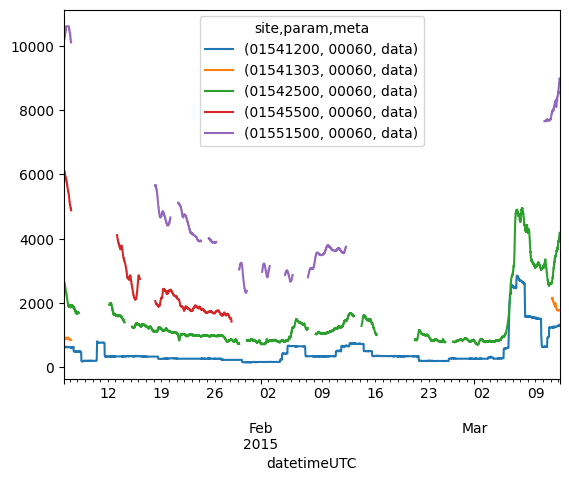

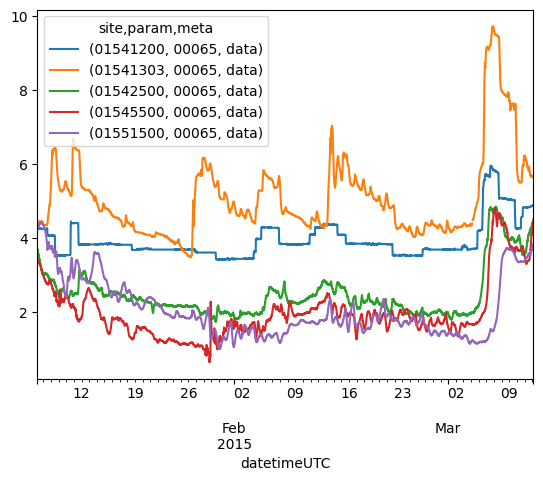

In [11]:
# Plot some of the gaps. What was going on with stage while discharge had missing data?
gap_id = 173 #The largest gap in discharge

gap = gaps_bylength.loc[gap_id,:]
site = gap['site']
param = gap['param']
first = gap['first']
last = gap['last']
print(gap)

# Plot discharge for the missing time period for every station
data.loc[first-day:last+day, (slice(None),'00060','data')].plot()

# Now plot stage for the same period
data.loc[first-day:last+day, (slice(None),'00065','data')].plot()

site                        01541303
param                          00060
gap_idx                           17
first      2014-01-21 05:00:00+00:00
last       2014-03-09 04:45:00+00:00
length              46 days 23:45:00
Name: 168, dtype: object


<Axes: xlabel='datetimeUTC'>

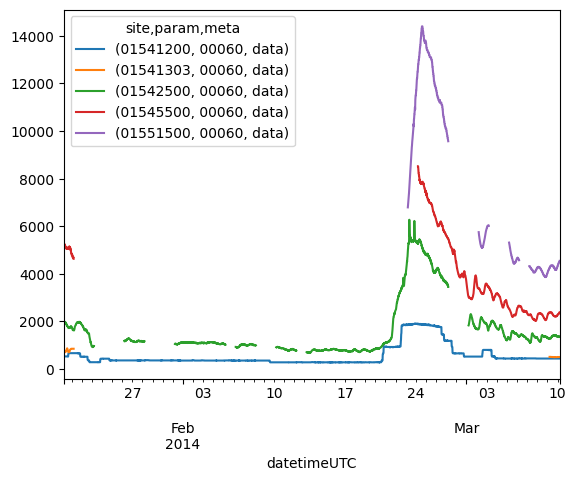

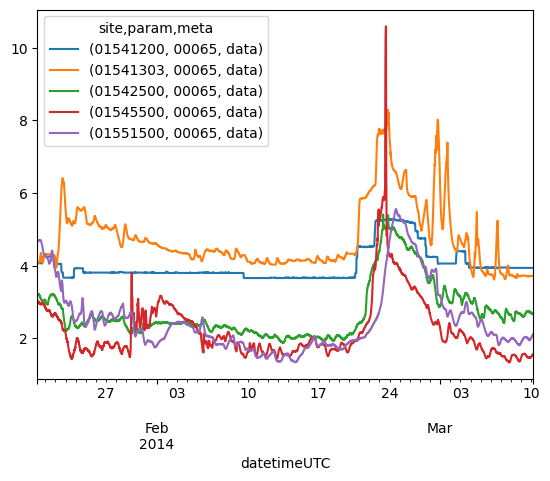

In [12]:
# Plot some of the gaps. What was going on with stage while discharge had missing data?
gap_id = 168 #The second largest gap in discharge that doesn't coincide with the largest gap... aka the third largest gap

gap = gaps_bylength.loc[gap_id,:]
site = gap['site']
param = gap['param']
first = gap['first']
last = gap['last']
print(gap)

# Plot discharge for the missing time period for every station
data.loc[first-day:last+day, (slice(None),'00060','data')].plot()

# Now plot stage for the same period
data.loc[first-day:last+day, (slice(None),'00065','data')].plot()

site                        01541200
param                          00065
gap_idx                           24
first      2013-05-19 13:15:00+00:00
last       2013-05-20 16:00:00+00:00
length               1 days 02:45:00
Name: 97, dtype: object


<Axes: xlabel='datetimeUTC'>

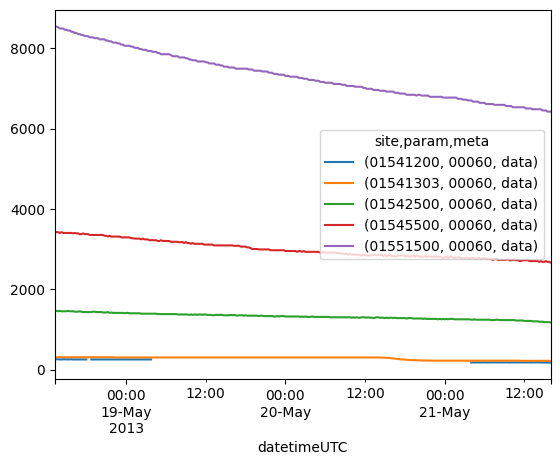

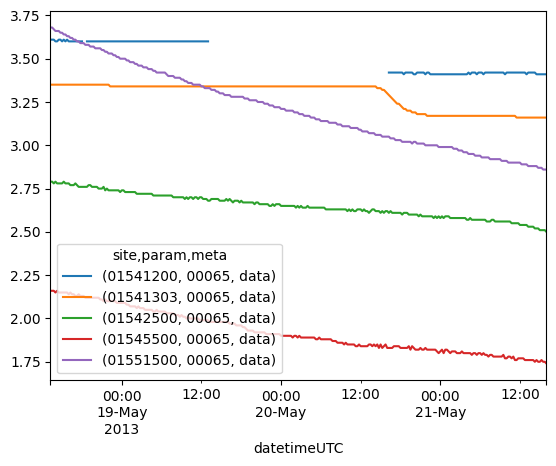

In [13]:
# Plot some of the gaps. What was going on with stage while discharge had missing data?
gap_id = 97 #The largest gap in stage

gap = gaps_bylength.loc[gap_id,:]
site = gap['site']
param = gap['param']
first = gap['first']
last = gap['last']
print(gap)

# Plot discharge for the missing time period for every station
data.loc[first-day:last+day, (slice(None),'00060','data')].plot()

# Now plot stage for the same period
data.loc[first-day:last+day, (slice(None),'00065','data')].plot()

In [14]:
mygaps.iloc[0]

first     2012-10-05 14:15:00+00:00
last      2012-10-05 14:15:00+00:00
length              0 days 00:00:00
Name: (01541200, 00060, 0), dtype: object

01541200 00060 2013-05-16 05:15:00+00:00 2013-05-18 06:00:00+00:00


<Axes: xlabel='datetimeUTC'>

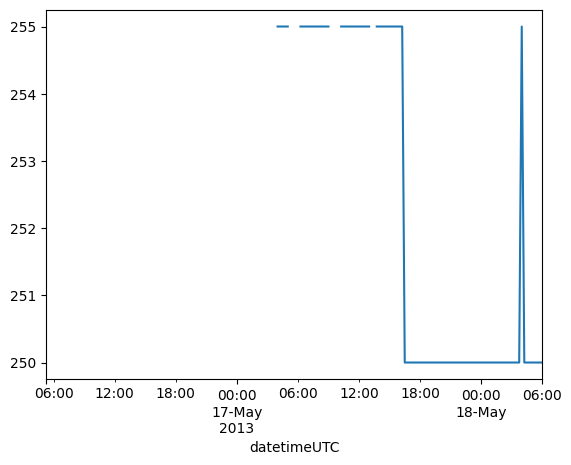

In [15]:
item = mygaps.iloc[14]
site, param, _ = item.name
start = item['first']-day
stop = item['last']+day
print(site, param, start, stop)

data.loc[start:stop, (site,param,'data')].plot()

# Plot Data Gaps
## and examine them one by one
Step 1: sort the list of datagaps by size in descending order
Step 2: plot the largest gaps in context (plot the other stations too)
Question: are any gaps okay to interpolate over? Are any not okay?

In [16]:
# Sort gaps by length.
sorted_gaps = mygaps.sort_values('length', axis='index', ascending=False).reset_index()
sorted_gaps.head(60)

,site,param,gap_idx,first,last,length
0,01541303,00060,22,2015-01-07 05:00:00+00:00,2015-03-11 03:45:00+00:00,62 days 22:45:00
1,01545500,00060,39,2015-01-28 05:00:00+00:00,2015-03-17 03:45:00+00:00,47 days 22:45:00
2,01541303,00060,17,2014-01-21 05:00:00+00:00,2014-03-09 04:45:00+00:00,46 days 23:45:00
3,01551500,00060,15,2014-01-19 05:00:00+00:00,2014-02-23 04:45:00+00:00,34 days 23:45:00
4,01545500,00060,17,2014-01-21 05:00:00+00:00,2014-02-24 04:45:00+00:00,33 days 23:45:00
5,01551500,00060,29,2015-02-12 05:00:00+00:00,2015-03-10 03:45:00+00:00,25 days 22:45:00
6,01545500,00060,16,2014-01-04 05:00:00+00:00,2014-01-15 04:45:00+00:00,10 days 23:45:00
7,01551500,00060,22,2015-01-07 05:00:00+00:00,2015-01-18 04:45:00+00:00,10 days 23:45:00
8,01541303,00060,15,2014-01-03 05:00:00+00:00,2014-01-13 04:45:00+00:00,9 days 23:45:00
9,01551500,00060,0,2013-01-23 05:00:00+00:00,2013-02-01 04:45:00+00:00,8 days 23:45:00


Site: 01551500 param 00060
   Gap #: 17   (1 days 23:45:00)
       Start: 2014-03-03 05:00:00+00:00
       Stop: 2014-03-05 04:45:00+00:00


<Axes: xlabel='datetimeUTC'>

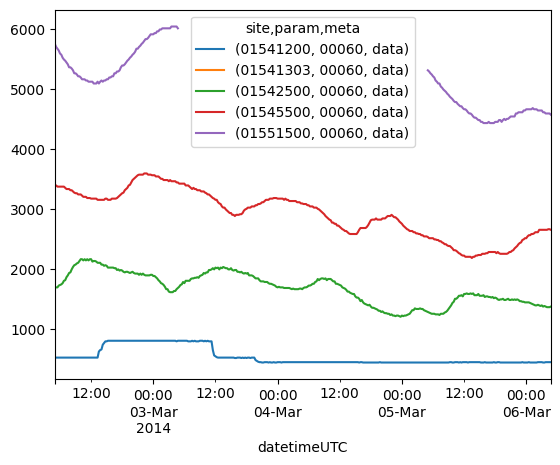

In [17]:
gap = 34
item = sorted_gaps.loc[gap]
site, param, idx, start, stop, length = item.loc[['site', 'param', 'gap_idx', 'first', 'last', 'length']]
print(f'Site: {site} param {param}\n   Gap #: {idx}   ({length})\n       Start: {start}\n       Stop: {stop}')

data.loc[start-day:stop+day, (slice(None),param,'data')].plot()